<a href="https://colab.research.google.com/github/shahrachmadf/4212201094_ATS_Shah-Rachmad-Faiz/blob/main/4212201094_ATS_Machine_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARY


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from mlxtend.plotting import plot_confusion_matrix

# MEMANGGIL DATASET


In [ ]:
import pandas as pd

train_data = pd.read_csv('/content/emnist-bymerge-train.csv', header=None)
test_data = pd.read_csv('/content/emnist-bymerge-test.csv', header=None)



PEMBAGIAN SAMPLE DAN PERUBAHAN JENIS DARI BILANGAN KE IMAGES

In [ ]:
X_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_train = train_data.iloc[:, 0].values.astype('int')
X_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_test = test_data.iloc[:, 0].values.astype('int')

max_samples = 1000
if len(X_train) > max_samples:
    X_train = X_train[:max_samples]
    y_train = y_train[:max_samples]

In [ ]:
max_samples = 1000
if len(X_test) > max_samples:
    X_test = X_test[:max_samples]
    y_test = y_test[:max_samples]

EKSTRAKSI DATASET DENGAN FITUR HOG


In [ ]:
hog_features_train = []
hog_images_train = []
for image in X_train:
    feature, hog_img = hog(image.reshape((28, 28)),
                           orientations=9,
                           pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2),
                           visualize=True,
                           block_norm='L2')
    hog_features_train.append(feature)
    hog_images_train.append(hog_img)
hog_features_train_np = np.array(hog_features_train)
hog_images_train_np = np.array(hog_images_train)

hog_features_test = []
hog_images_test = []
for image in X_test:
    feature, hog_img = hog(image.reshape((28, 28)),
                           orientations=9,
                           pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2),
                           visualize=True,
                           block_norm='L2')
    hog_features_test.append(feature)
    hog_images_test.append(hog_img)
hog_features_test_np = np.array(hog_features_test)
hog_images_test_np = np.array(hog_images_test)

NORMALISASI DATA HOG

In [ ]:
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train_np)
hog_features_test_scaled = scaler.transform(hog_features_test_np)


KLASIFIKASI DATA DENGAN SVM**

In [ ]:
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

PERHITUNGAN DENGAN LOOCV YAITU KONFUSI MATRIKS, AKURASI, PRESISI, RECALL,dan F1 SCORE
**

In [ ]:
loo = LeaveOneOut()
y_pred = cross_val_predict(clf, hog_features_train_scaled, y_train, cv=loo)

loo_confusion_matrix = confusion_matrix(y_train, y_pred)
loo_accuracy = accuracy_score(y_train, y_pred)
loo_precision = precision_score(y_train, y_pred, average='weighted')
loo_recall = recall_score(y_train, y_pred, average='weighted')
loo_f1 = f1_score(y_train, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("LOOCV Results (Training Data):")
print("Confusion Matrix:")
print(loo_confusion_matrix)
print("Accuracy:", loo_accuracy)
print("Precision:", loo_precision)
print("Recall:", loo_recall)
print("F1 Score:", loo_f1)

LOOCV Results (Training Data):
Confusion Matrix:
[[41  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 52 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 16  1]
 [ 0  0  1 ...  0  0 16]]
Accuracy: 0.625
Precision: 0.5620162931674574
Recall: 0.625
F1 Score: 0.5709567283612091


# **GENERATE TABEL MATRIKS


In [ ]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(conf_mat=cm, ax=ax, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

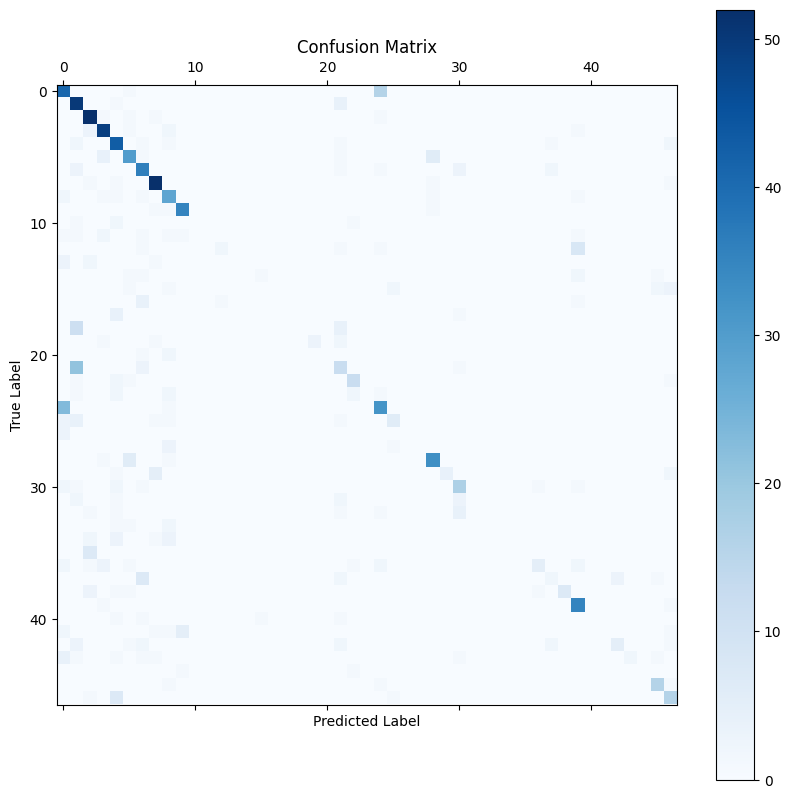

In [ ]:

def plot_confusion_matrix_custom(cm):
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


plot_confusion_matrix_custom(loo_confusion_matrix)


In [ ]:
def plot_images_with_hog(x, hog_images, title=""):
    fig, axes = plt.subplots(2, 10, figsize=(15, 5))
    fig.suptitle(title)

    # Plot original images
    for i in range(min(len(x), 10)):
        axes[0, i].imshow(x[i].reshape((28, 28)), cmap='gray')
        axes[0, i].axis('off')

    # Plot HOG images
    for i in range(min(len(hog_images), 10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap='gray')
        axes[1, i].axis('off')

    plt.show()

In [ ]:
def extract_hog_images(images):
    hog_images = []
    for image in images:
        _, hog_img = hog(image.reshape((28, 28)),
                         orientations=9,
                         pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2),
                         visualize=True,
                         block_norm='L2')
        hog_images.append(hog_img)
    return np.array(hog_images)

In [ ]:
hog_images_train = extract_hog_images(X_train)

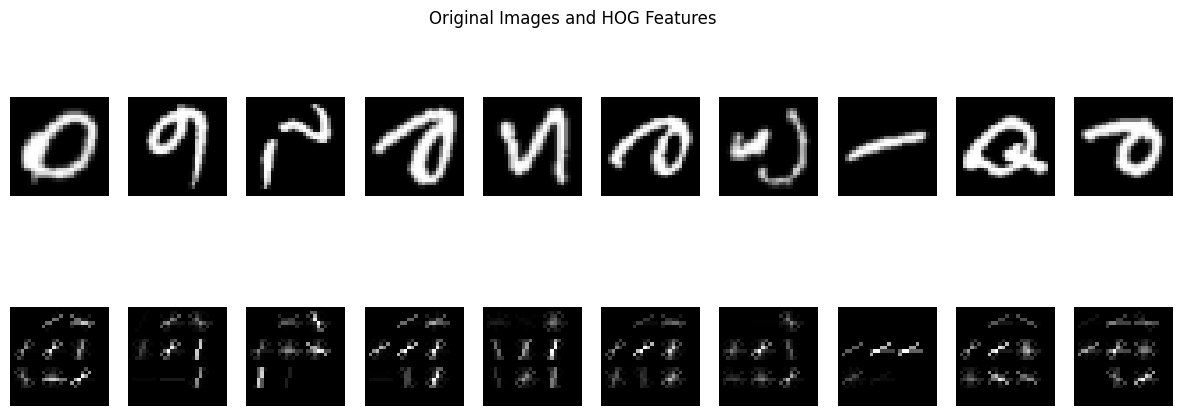

In [ ]:
plot_images_with_hog(X_train, hog_images_train, title="Original Images and HOG Features")

**Shah Rachmad Faiz / 4212201094**